

# ARTIFICIAL NEURAL NETWORK


## 
## Import all the libraries and 'iris' dataset from sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
iris_data = load_iris()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Check the type of the iris dataset

In [2]:
type(iris_data)

sklearn.utils.Bunch

### Which keys are there in iris dataset

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Check what kind of data is there in target column/ Dependent variable

In [4]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Check the name of the targeted values/ Dependent variable

In [5]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Independent variable names

In [6]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Check the values of the Independent variables

In [7]:
iris_data.data[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

### Create a dataset of all independent values for better understanding

In [8]:
iris = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Add targeted column to dataset

In [9]:
iris['target'] = iris_data.target

### Print the final Dataset

In [10]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Check for any null values in our data

In [11]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### We don't have any null value in our data

### Scatter Plot to understand the relation between dependent variable and independent variable

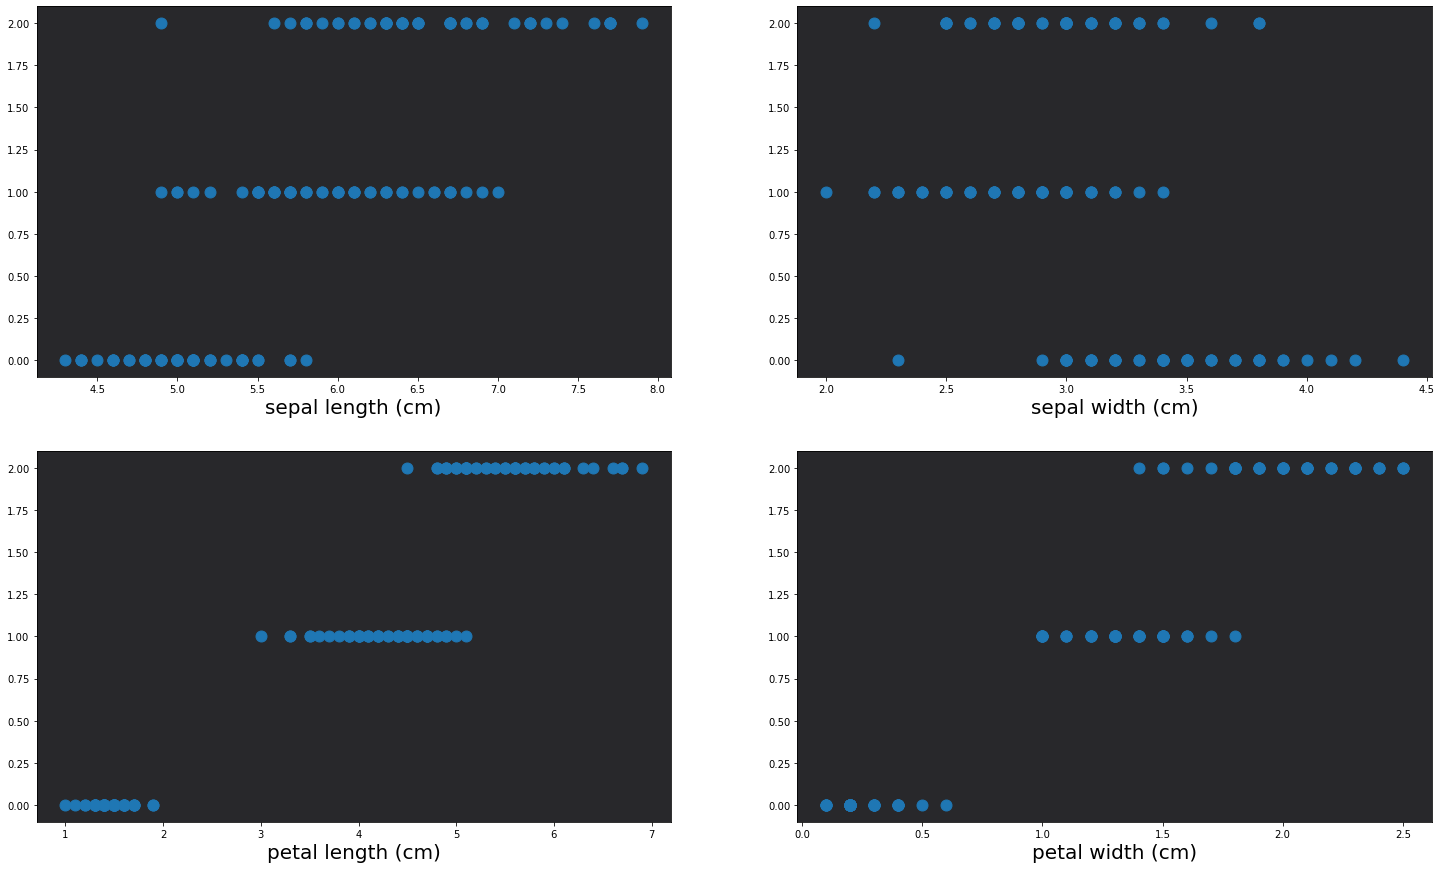

In [12]:
# Plot scatterplot of all the columns to target column

col = iris_data.feature_names

fig,ax = plt.subplots(2,2,figsize=(25, 15))
y1 = iris['target']

#print(y1)
for i,axes in enumerate(ax.ravel()):
    x1 = iris[col[i]]
    axes.scatter(x1,y1,s=120)
    axes.set_xlabel(col[i],size=20)
    axes.set_facecolor('#28282B')
    i = i+1

### Scatter plot of 
### 'Sepal Length' - 'Sepal Width' &
### 'Petal Length' - 'Petal Width'

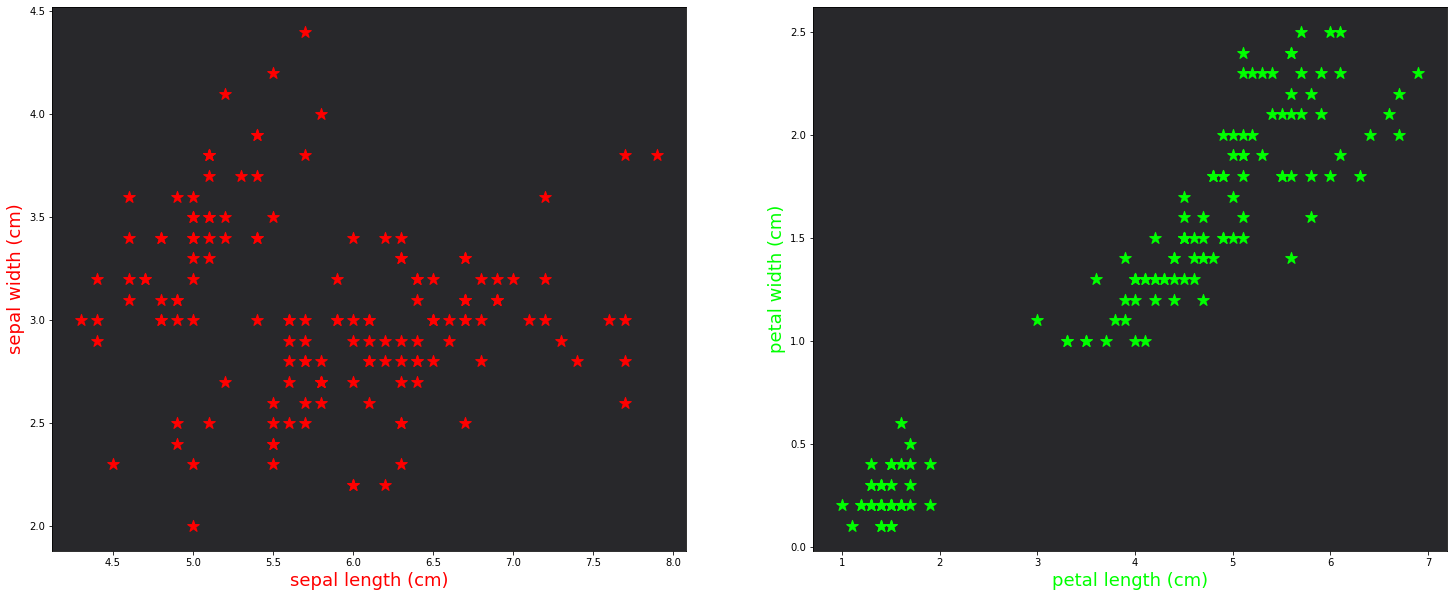

In [13]:
# Plot scatterplot of all the columns

col = iris_data.feature_names

count=1
fig, axes = plt.subplots(1,2,figsize=(25, 10))

axes[0].scatter(iris['sepal length (cm)'],iris['sepal width (cm)'], marker="*", color="red", s=150)
axes[0].set_xlabel('sepal length (cm)',size=18,color='red')
axes[0].set_ylabel('sepal width (cm)',size=18,color='red')
axes[0].set_facecolor('#28282B')

axes[1].scatter(iris['petal length (cm)'],iris['petal width (cm)'], marker="*", color="lime", s=150)
axes[1].set_xlabel('petal length (cm)',size=18,color='lime')
axes[1].set_ylabel('petal width (cm)',size=18,color='lime')
axes[1].set_facecolor('#28282B')

## 
## Check for the Correlation between all the columns.
### Find the most affected columns to target column

In [14]:
correlation_matrix = iris.corr().round(2)
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.00,-0.12,0.87,0.82,0.78
sepal width (cm),-0.12,1.00,-0.43,-0.37,-0.43
petal length (cm),0.87,-0.43,1.00,0.96,0.95
petal width (cm),0.82,-0.37,0.96,1.00,0.96
target,0.78,-0.43,0.95,0.96,1.00


### Plot the correlation

<AxesSubplot:>

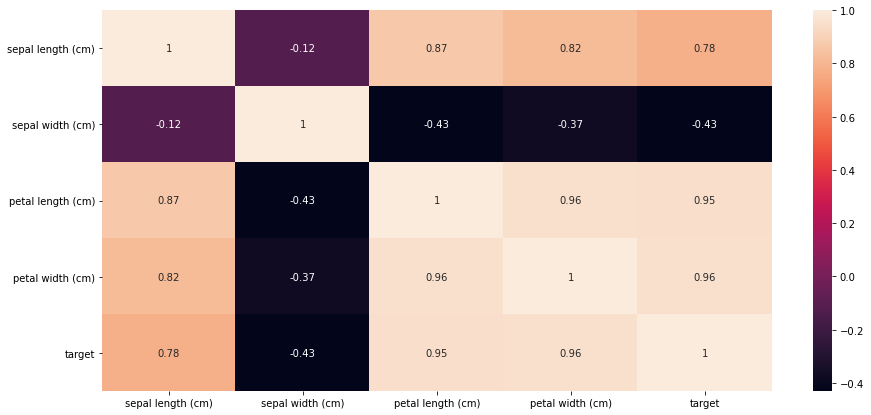

In [15]:
plt.figure(figsize=(15,7))
#correlation_matrix
sns.heatmap(data=correlation_matrix, annot=True)

### We can see that some features are positively correlated and some are negatively correlated

### We will take all 4 features to predict our data by training the model.

### Now split the dataset into the train and test set

#### Assign all the independent values to 'x' and dependent value to 'y'

In [16]:
x = iris_data.data
y = iris_data.target

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

### Check the shape of our training and testing sets

In [18]:
print("X_train set size:",X_train.shape)
print("X_test set size:",X_test.shape)
print("Y_train set size:",Y_train.shape)
print("Y_test set size:",Y_test.shape)

X_train set size: (120, 4)
X_test set size: (30, 4)
Y_train set size: (120,)
Y_test set size: (30,)


### 
## Now make a model of MLP Classifier Neural Network from sklearn library

In [19]:
model = MLPClassifier(hidden_layer_sizes=(3,10),
                       solver='sgd',learning_rate='constant', 
                      learning_rate_init=0.1, random_state=0, max_iter=1000)

#### We have taken learning rate as 0.1 and maximum iteration as 1000.
#### So our model will only iterate 1000 time maximum.
#### There are two hidden layers and in both there are 3 and 10 hidden objects respectively.
#### we have used 'stochastic gradient descent' as solver. 

### 
### Train our model by fitting our training datasets

In [20]:
model.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(3, 10), learning_rate_init=0.1, max_iter=1000,
              random_state=0, solver='sgd')

## Check our model performance

In [21]:
print('\nModel Score: ',model.score(X_test,Y_test))
print('\nCurrent loss computed with the loss function: ',model.loss_)
print('\nNumber of Coefs: ', len(model.coefs_))
#print('\ncoefs: ', model.coefs_)
#print('\nintercepts: ',model.intercepts_)
print('\nNumber of iterations the solver: ', model.n_iter_)
print('\nNum of layers: ', model.n_layers_)
print('\nNum of o/p: ', model.n_outputs_)



Model Score:  0.2

Current loss computed with the loss function:  1.0971329929274767

Number of Coefs:  3

Number of iterations the solver:  25

Num of layers:  4

Num of o/p:  3


#### We can see that, our model only iterate 25 times...
#### There are in total 4 layers.. 2 hidden layer.. 1 input layer... 1 output layer...
### Our model score is only 0.23
#### 

## Let's make a new model with some changes.

In [22]:
new_model = MLPClassifier(hidden_layer_sizes=(3,10),
                       solver='sgd',learning_rate='constant', 
                      learning_rate_init=0.01, random_state=0, max_iter=1000)

#### We have taken learning rate as 0.01 and maximum iteration as 1000.
#### So our model will only iterate 1000 time maximum.
#### There are two hidden layers and in both there are 3 and 10 hidden objects respectively.
#### we have used 'stochastic gradient descent' as solver. 

### 
### Now train our new model.

In [23]:
new_model.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(3, 10), learning_rate_init=0.01,
              max_iter=1000, random_state=0, solver='sgd')

## 
## Check model performance.

In [24]:
print('\nModel Score: ',new_model.score(X_test,Y_test))
print('\nCurrent loss computed with the loss function: ',new_model.loss_)
print('\nNumber of Coefs: ', len(new_model.coefs_))
#print('\ncoefs: ', new_model.coefs_)
#print('\nintercepts: ',new_model.intercepts_)
print('\nNumber of iterations the solver: ', new_model.n_iter_)
print('\nNum of layers: ', new_model.n_layers_)
print('\nNum of o/p: ', new_model.n_outputs_)


Model Score:  1.0

Current loss computed with the loss function:  0.06404776593217612

Number of Coefs:  3

Number of iterations the solver:  241

Num of layers:  4

Num of o/p:  3


#### We can see that, our model iterate 248 times...
#### There are in total 4 layers.. 2 hidden layer.. 1 input layer... 1 output layer...
### Our model score is only 0.93
### That means our new model is working pretty fine.
#### 

## 
## Let's compare both models

In [25]:
Y_predict = model.predict(X_test)
Y_predict_new = new_model.predict(X_test)

dt = {'Values':['Value1','Value2','Value3','Value4','Value5','Value6','Value7'],
      'Actual':Y_test[:7],
      'First Model':Y_predict[:7],
      'Second Model':Y_predict_new[:7]}
pred_test = pd.DataFrame(dt)
pred_test

,Values,Actual,First Model,Second Model
0,Value1,0,1,0
1,Value2,1,1,1
2,Value3,0,1,0
3,Value4,1,1,1
4,Value5,2,1,2
5,Value6,0,1,0
6,Value7,0,1,0


### We can see that, first model doesn't predict accurate values..
### But, second model predicts highly accurate values.

## 
## Matrix Evaluation

In [26]:
matrix_evaluation = pd.DataFrame({'Rate' :['0.01','0.001'],
                                'MAE': [mean_absolute_error(Y_test,Y_predict),
                                        mean_absolute_error(Y_test,Y_predict_new)], 
                                'MSE': [mean_squared_error(Y_test,Y_predict),
                                        mean_squared_error(Y_test,Y_predict_new)],
                                'RMSE': [np.sqrt(mean_squared_error(Y_test,Y_predict)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict_new))],
                                'R2_score': [r2_score(Y_test,Y_predict),
                                             r2_score(Y_test,Y_predict_new)],
                                'Accuracy Score': [accuracy_score(Y_test,Y_predict),
                                                   accuracy_score(Y_test,Y_predict_new)] })


matrix_evaluation

,Rate,MAE,MSE,RMSE,R2_score,Accuracy Score
0,0.01,0.8,0.8,0.894427,-0.005587,0.2
1,0.001,0.0,0.0,0.000000,1.000000,1.0


### First model has very high errors..
### Second model has very low errors.

## 
## Error Loss graph (Learning with every iteration)

Text(0.5, 1.0, 'Model-2')

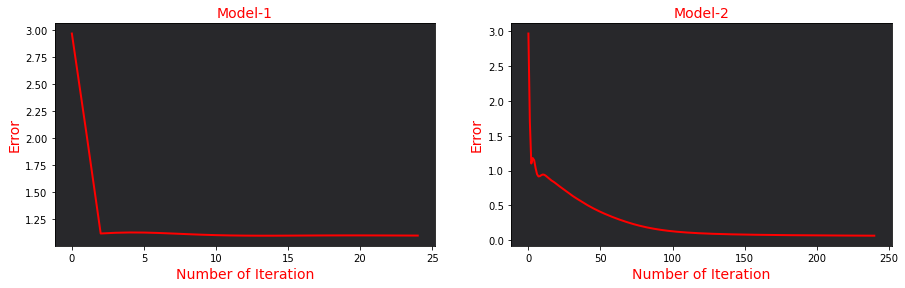

In [27]:
fig = plt.figure(figsize=(15,9))

ax1 = fig.add_subplot(221)
ax1.plot(model.loss_curve_,lw=2,color='red')
ax1.set_xlabel('Number of Iteration',size=14,color='red')
ax1.set_ylabel('Error',size=14,color='red')
ax1.set_facecolor('#28282B')
ax1.set_title('Model-1',size=14,color='red')

ax2 = fig.add_subplot(222)
ax2.plot(new_model.loss_curve_,lw=2,color='red')
ax2.set_xlabel('Number of Iteration',size=14,color='red')
ax2.set_ylabel('Error',size=14,color='red')
ax2.set_facecolor('#28282B')
ax2.set_title('Model-2',size=14,color='red')

### Model-1 has significant loss in the starting but it goes stable with iteration.. not close enough to zero.
### Model-2 learnt with every iteration, and by the end it error gets very close to zero

## 
## Confusion Matrix

In [28]:
cm1 = confusion_matrix(Y_test,Y_predict)
cm2 = confusion_matrix(Y_test,Y_predict_new)

print("Confusion Matrix of Model-1\n\n",cm1)
print("\n\nConfusion Matrix of Model-2\n\n",cm2)

Confusion Matrix of Model-1

 [[ 0 13  0]
 [ 0  6  0]
 [ 0 11  0]]


Confusion Matrix of Model-2

 [[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]


## 
## Visualization of confusion matrix

Text(0, 0.5, 'Actual Values')

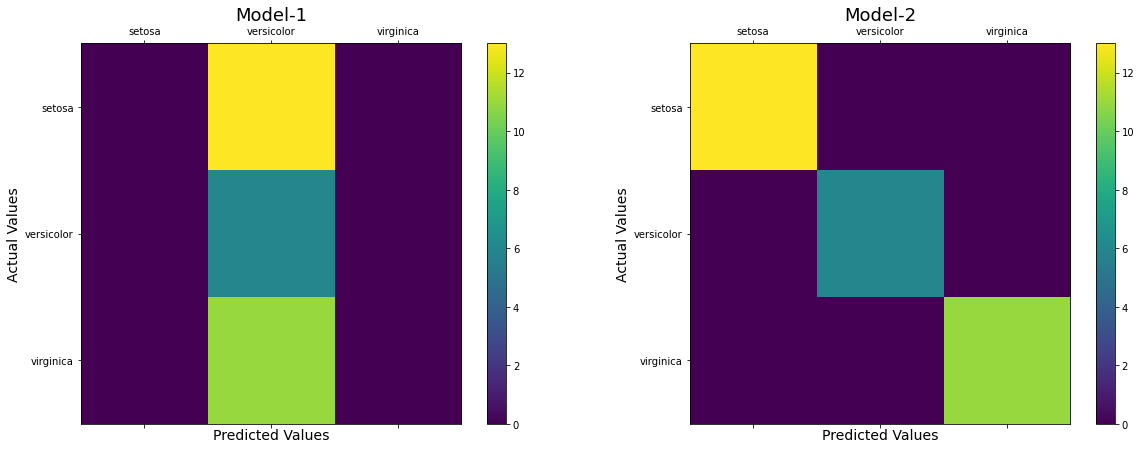

In [29]:
labels = list(iris_data.target_names)

fig = plt.figure(figsize=(20,7))


ax1 = fig.add_subplot(121)
mv = ax1.matshow(cm1)
ax1.set_title('Model-1',size=18)
fig.colorbar(mv)
ax1.set_xticklabels([''] + labels)
ax1.set_yticklabels([''] + labels)
ax1.set_xlabel('Predicted Values',size=14)
ax1.set_ylabel('Actual Values',size=14)


ax2 = fig.add_subplot(122)
mv = ax2.matshow(cm2)
ax2.set_title('Model-2',size=18)
fig.colorbar(mv)
ax2.set_xticklabels([''] + labels)
ax2.set_yticklabels([''] + labels)
ax2.set_xlabel('Predicted Values',size=14)
ax2.set_ylabel('Actual Values',size=14)



## 
## Classification report 

In [30]:
cr1 = classification_report(Y_test,Y_predict,target_names=labels)
cr2 = classification_report(Y_test,Y_predict_new,target_names=labels)

print("Classification Report:\n\n",cr1)
print("\n\nClassification Report:\n\n",cr2)

Classification Report:

               precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        13
  versicolor       0.20      1.00      0.33         6
   virginica       0.00      0.00      0.00        11

    accuracy                           0.20        30
   macro avg       0.07      0.33      0.11        30
weighted avg       0.04      0.20      0.07        30



Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### We can see that, Model-2 is a way better than Model-1 in terms of accuracy, recall, f1-score...
### 

## Let's predict for a random data

In [31]:
import random 
random.seed(7889)

# Gives a random number between 0 and total length of the dataset
random_num = random.randint(0,len(iris))

# Selects a random column with random number we found above
trail = iris.drop('target', axis=1).iloc[random_num]
trail

sepal length (cm)    5.2
sepal width (cm)     4.1
petal length (cm)    1.5
petal width (cm)     0.1
Name: 32, dtype: float64

In [32]:
X_test.shape

(30, 4)

In [33]:
trail = trail.values.reshape(1,-1)
trail.shape

(1, 4)

In [34]:
trail

array([[5.2, 4.1, 1.5, 0.1]])

## 
## Compare predict of both models

In [35]:
pred = pd.DataFrame({'Type': ['Actual','Model-1', 'Model-2'],
                     'Value': [iris.iloc[random_num]['target'], 
                                   model.predict(trail)[0],
                                   new_model.predict(trail)[0]
                                  ]})

pred

,Type,Value
0,Actual,0.0
1,Model-1,1.0
2,Model-2,0.0


### Here, again model-2 is giving correct output..

## 
## So, our neural network model performed really well.. 
### We saw the difference between the learning rate and how it affected our both of the models' performances.
## Our model 2 is ready to use model.